In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
#Para cargar el Dataset desde el drive
from google.colab import drive
drive.mount('/content/drive')
file_path2 = '/content/drive/MyDrive/Libro3.xlsx'
df= pd.read_excel(file_path2)

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Participante,Equipo,País,Jefe,Promedio,C1,C2,C3,C4,C5,C6,Big Whale,vs Prod Cert,AC Count,Lider Acs,Mayor New Logos,Procesos,Mejor Pipeline
0,Agustina Gomez,D2M,MÉXICO,Hector Bustamante,3.000000,3,4,4,3,2,2,0.115,4.980,1,0.715,1.0,4.0,0.170
1,Alejandro Benjamin Peña,D2M,MÉXICO,Hector Bustamante,3.500000,4,4,4,4,2,3,0.000,0.000,1,0.715,0.0,4.0,0.135
2,Alvaro Gomez de La Torre,KAM,PERÚ,Monica Vergara,4.166667,4,5,4,4,4,4,0.000,0.000,3,5.000,0.0,4.5,2.100
3,Andrea Elizabeth Garzón Suarez,D2M,ECUADOR,Viviana Poblete,4.000000,5,5,4,4,3,3,0.095,4.945,0,0.000,1.0,2.0,0.310
4,Angie Paola Duque Franco,D2M,COLOMBIA,Doris Adriana Herinquez,2.833333,3,3,4,3,2,2,0.000,0.000,1,0.715,0.0,4.0,0.510


<ipython-input-34-da657b77245d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


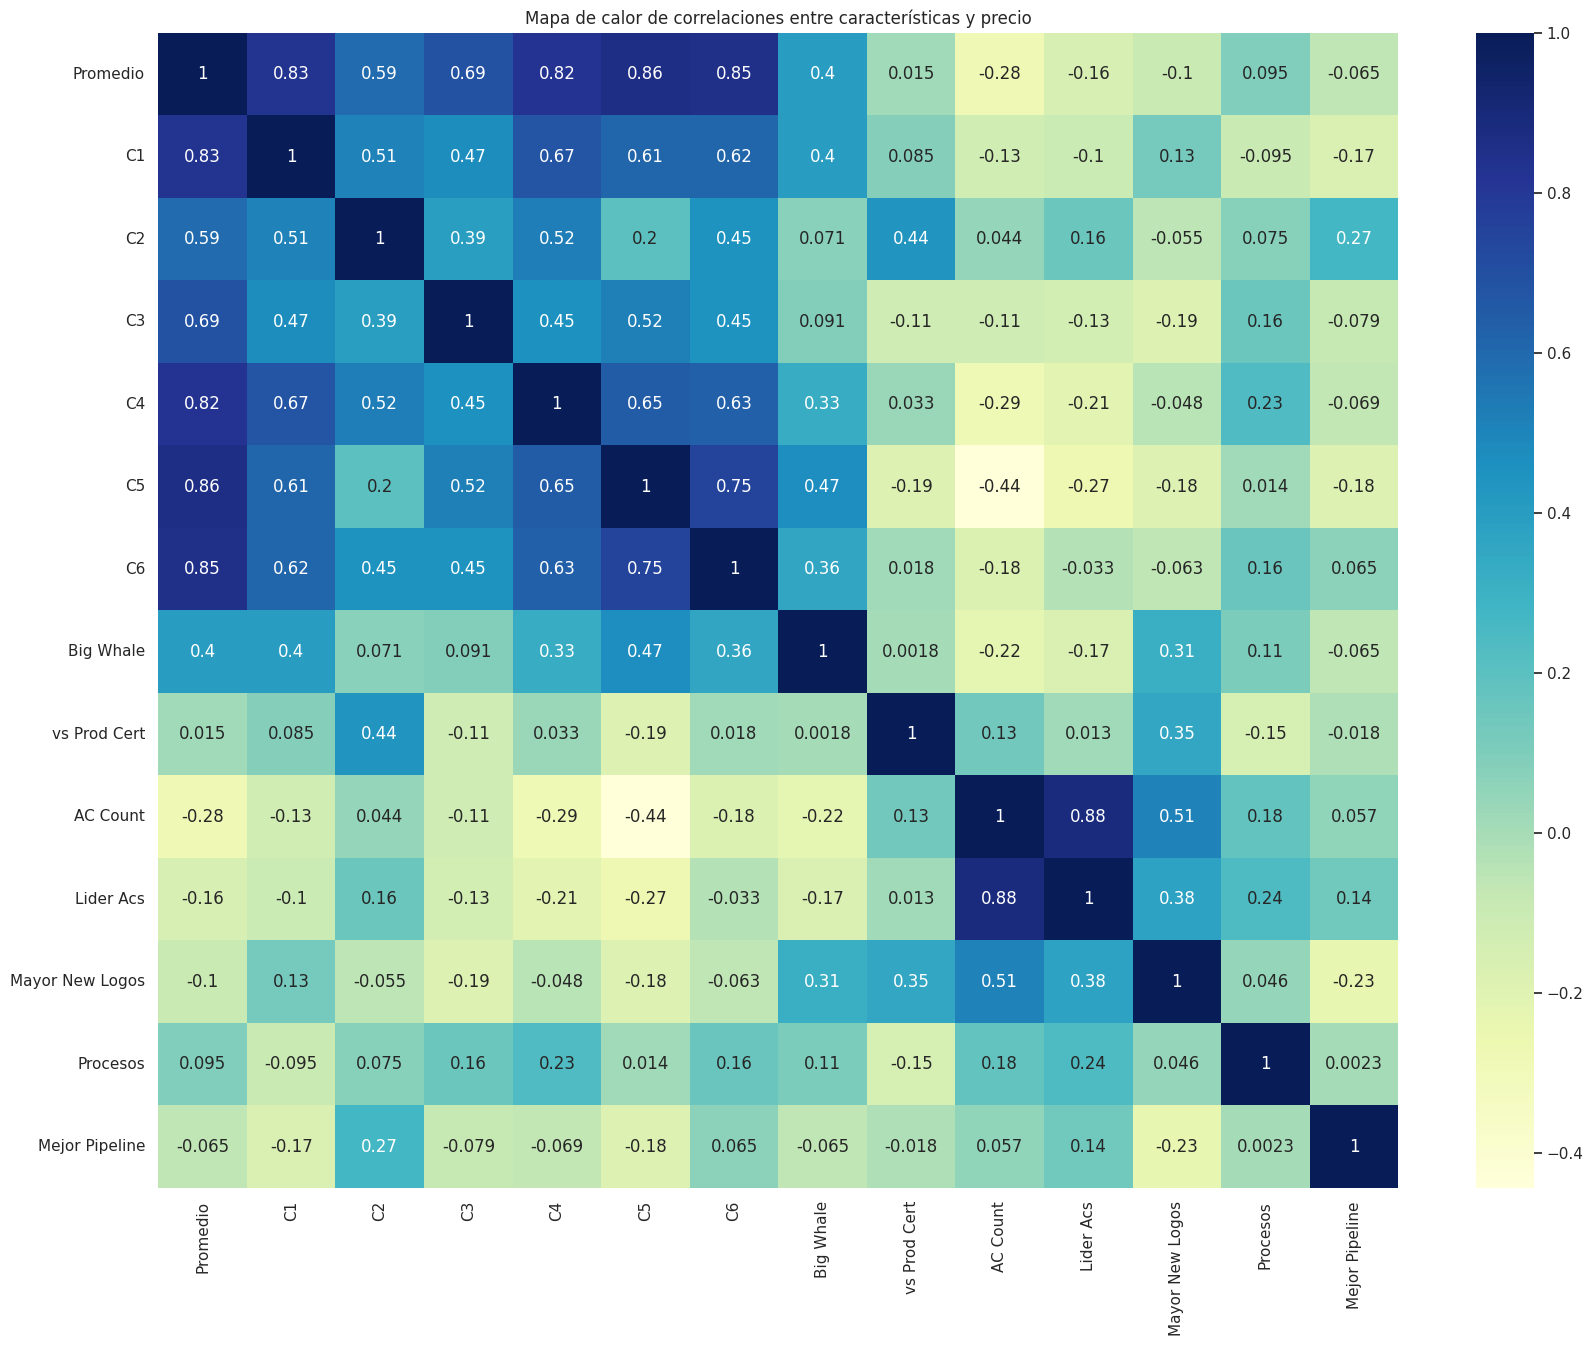

In [ ]:
# Creación de la matriz de correlación
corr_matrix = df.corr()
# Creación del mapa de calor
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

# Añadir título
ax.set_title("Mapa de calor de correlaciones entre características y precio")

plt.show()

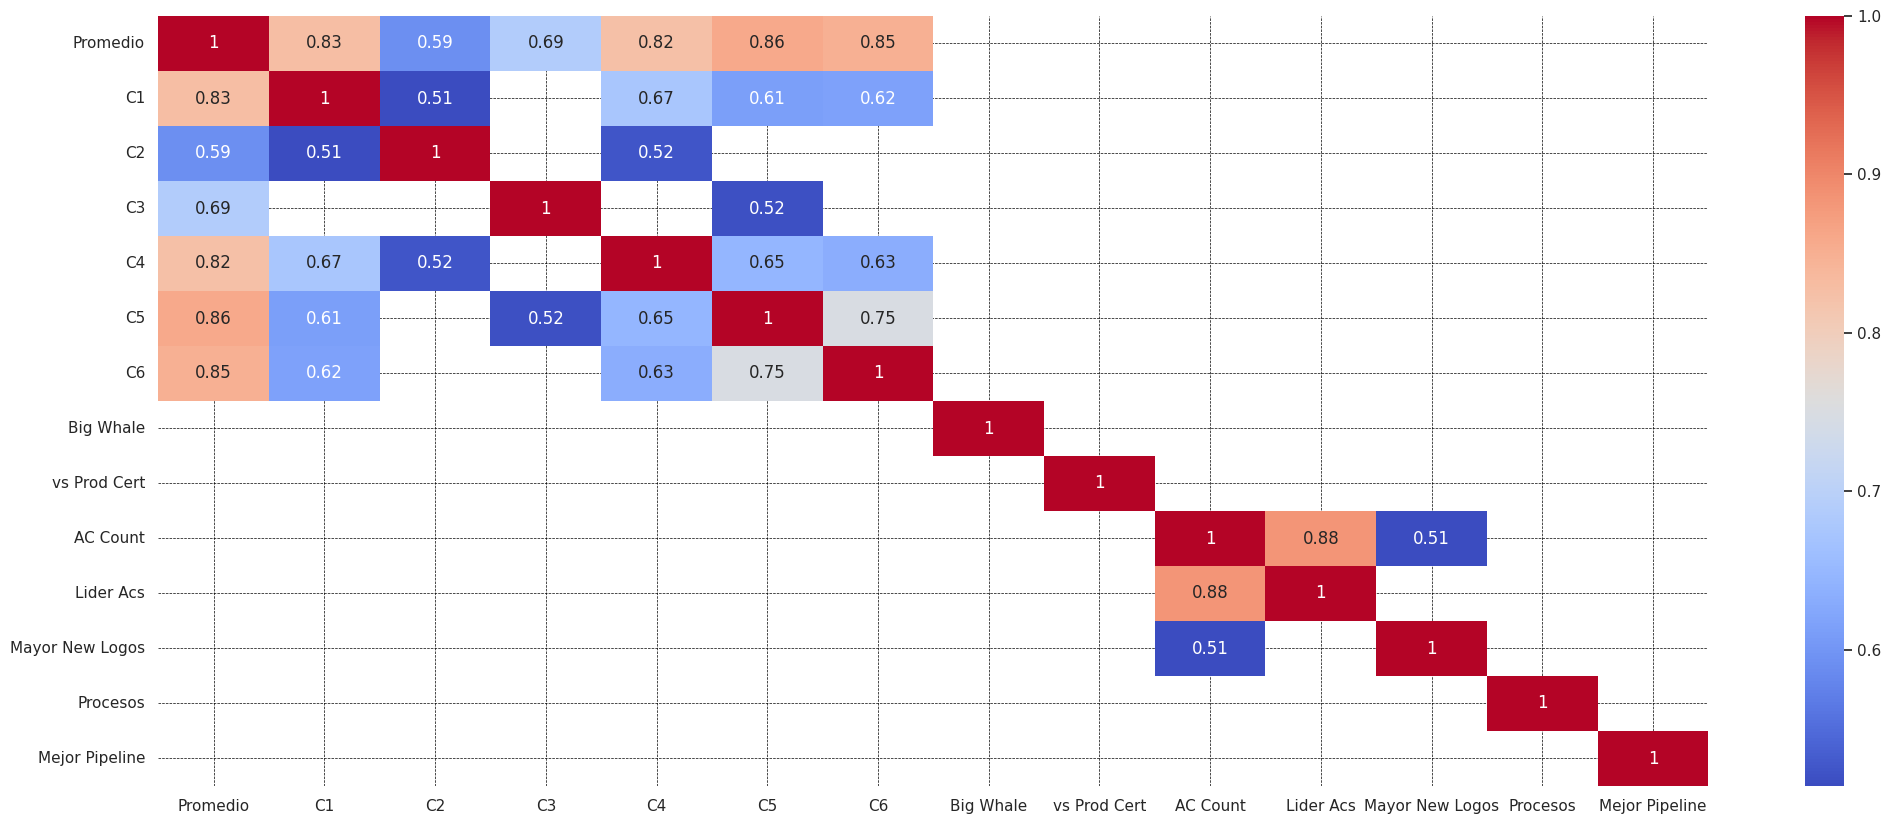

In [ ]:
# Filtra los valores de correlación menores o iguales a 0.6
filtered_corr_matrix = corr_matrix.mask(corr_matrix <= 0.5)

# Configura el tamaño de la figura
plt.figure(figsize=(25, 10))

# Genera el mapa de calor con los valores filtrados
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm')
plt.grid(True, linestyle='--', linewidth=0.5, color='black')

# Muestra el gráfico
plt.show()

#Primeras conclusiones
Las variables con mayor correlación son las siguientes:

###Antiguedad de meses con:

*   Valoración jefe
*   Conocimientos generales
*   Producto (Q-stream)
*   Ponderado (Q-stream)

### Entrenamientos que más afectaron al rendimiento de los Q-stream


*   MCC y Hoja de Ruta
*   Servicio post venta

### KPI's


*   Procesos de venta consultiva con mejor pipe line
*   Valoración jefe con mejor pipe line y procesos


*   Lider Acs con Logos
*   Valoración jefe con poderado (Q-streams)


















In [ ]:
corr_pairs = []
n = corr_matrix.shape[0]  # Número de variables


for i in range(n):
    for j in range(i+1, n):
        corr = corr_matrix.iloc[i, j]
        if abs(corr) > 0.5:
            corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr))

# Imprime las parejas de variables con correlación superior a 0.6 y su valor de correlación
for pair in corr_pairs:
    print(pair)

('Promedio', 'C1', 0.8275653072108808)
('Promedio', 'C2', 0.5913386994404829)
('Promedio', 'C3', 0.6873423943592691)
('Promedio', 'C4', 0.8248624485380736)
('Promedio', 'C5', 0.8590392628075826)
('Promedio', 'C6', 0.849395897190691)
('C1', 'C2', 0.5139940529625883)
('C1', 'C4', 0.6749208727741417)
('C1', 'C5', 0.6125113429076744)
('C1', 'C6', 0.6155339655075893)
('C2', 'C4', 0.5247771482243904)
('C3', 'C5', 0.5192509577708599)
('C4', 'C5', 0.645452205556504)
('C4', 'C6', 0.6317137749461446)
('C5', 'C6', 0.7482682282757459)
('AC Count', 'Lider Acs', 0.8824457817068048)
('AC Count', 'Mayor New Logos', 0.5148625808243309)


In [ ]:
column_array = df['Big Whale'].values
media = np.mean(column_array)
desviacion_estandar = np.std(column_array)
column_array

array([ 0.23,  0.  ,  0.  ,  0.19,  0.  ,  0.  ,  5.57,  0.  ,  3.95,
        0.  ,  0.  ,  0.  , 10.  ,  0.  ,  0.2 ,  0.02,  0.  ,  0.08,
        0.  ,  0.  ,  0.12,  0.6 ,  0.  ])

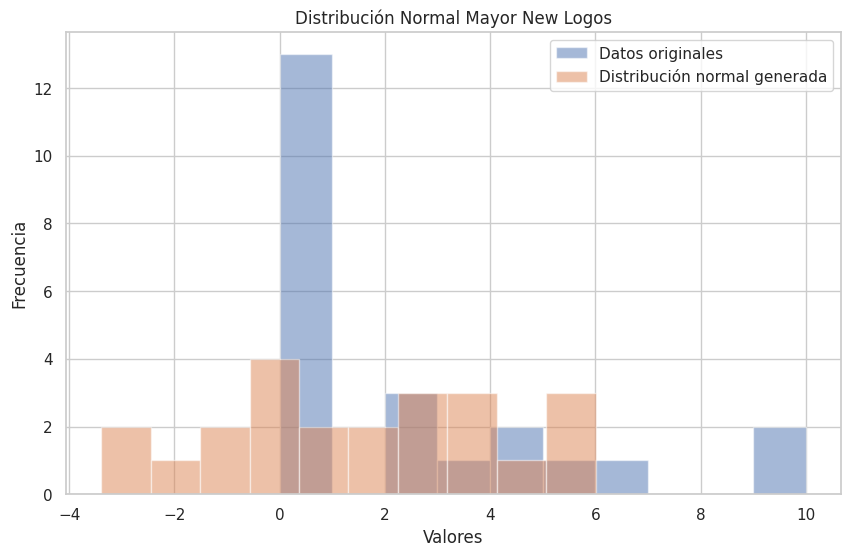

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Array proporcionado
data_array = np.array([ 2,  0,  0,  2,  0,  0,  0,  0, 10,  0,  0,  4,  5,  0,  6,  3,  0,
        2,  0,  0, 10,  4,  0])
# Calcular la media y desviación estándar del array
media = np.mean(data_array)
desviacion_estandar = np.std(data_array)

# Generar datos con distribución normal utilizando numpy
datos_distribucion_normal = np.random.normal(media, desviacion_estandar, len(data_array))

# Graficar los datos originales y los datos de la distribución normal generada
plt.figure(figsize=(10, 6))
plt.hist(data_array, bins=10, alpha=0.5, label='Datos originales')
plt.hist(datos_distribucion_normal, bins=10, alpha=0.5, label='Distribución normal generada')
plt.title('Distribución Normal Mayor New Logos')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


In [ ]:
column_array = df['Mayor New Logos'].values
media = np.mean(column_array)
desviacion_estandar = np.std(column_array)
column_array

array([ 2,  0,  0,  2,  0,  0,  0,  0, 10,  0,  0,  4,  5,  0,  6,  3,  0,
        2,  0,  0, 10,  4,  0])

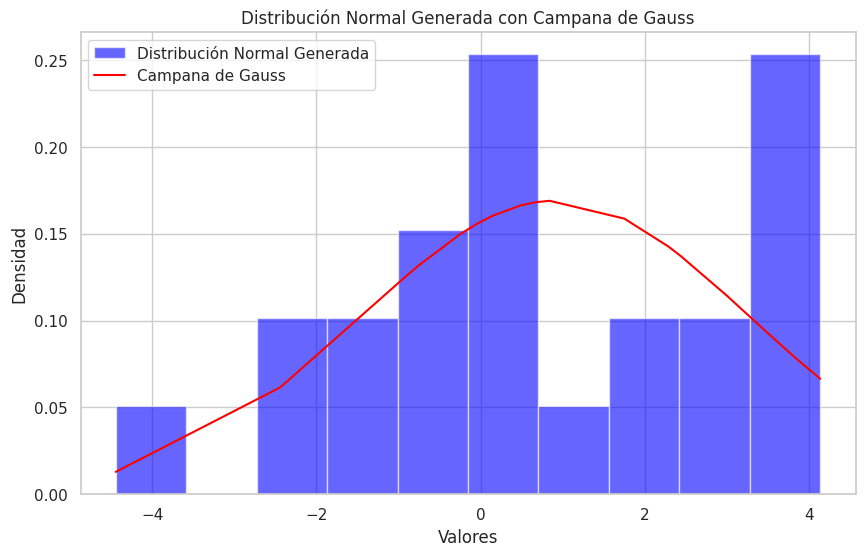

In [ ]:
 import numpy as np
import matplotlib.pyplot as plt

# Array proporcionado
data_array = np.array([0.23, 0.0, 0.0, 0.19, 0.0, 0.0, 5.57, 0.0, 3.95, 0.0, 0.0, 0.0, 10.0, 0.0, 0.2, 0.02, 0.0, 0.08, 0.0, 0.0, 0.12, 0.6, 0.0])

# Calcular la media y desviación estándar del array
media = np.mean(data_array)
desviacion_estandar = np.std(data_array)

# Generar datos con distribución normal utilizando numpy
datos_distribucion_normal = np.random.normal(media, desviacion_estandar, len(data_array))

# Graficar los datos de la distribución normal generada con la campana de Gauss
plt.figure(figsize=(10, 6))
plt.hist(datos_distribucion_normal, bins=10, density=True, alpha=0.6, color='blue', label='Distribución Normal Generada')
plt.plot(np.sort(datos_distribucion_normal), 1/(desviacion_estandar * np.sqrt(2 * np.pi)) * np.exp(-(np.sort(datos_distribucion_normal) - media)**2 / (2 * desviacion_estandar**2)), color='red', label='Campana de Gauss')
plt.title('Distribución Normal Generada con Campana de Gauss')
plt.xlabel('Valores')
plt.ylabel('Densidad')
plt.legend()
plt.show()
